This is the 5th exercise of Andrew Ng's [Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome) written with Python3

## Regularized Linear Regression and Bias-Variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import func
plt.rc('text',usetex=True)
plt.rc('font',family='Times New Roman')
%matplotlib inline
# Load data
dataMat = loadmat('data/ex5data1.mat')
X = dataMat['X']
y = dataMat['y']
Xval = dataMat['Xval']
yval = dataMat['yval']
Xb = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
Xvalb = np.concatenate([np.ones([Xval.shape[0],1]),Xval],axis=1)

In [2]:
# Reguularized Linear Regression Cost and Gradient
theta = np.array([1,1]) # 1 times n+1 due to minmize
J = func.costfunc(theta, Xb, y, 1)
grad = func.gradient(theta, Xb, y, 1)
print('Cost at theta = [1 ; 1]: {0}; this value should be about 303.993192'.format(J[0,0]))
print('gradient at theta = [1 ; 1]: {0}; \nthis value should be about [-15.303016; 598.250744]'.format(grad))

Cost at theta = [1 ; 1]: 303.9931922202643; this value should be about 303.993192
gradient at theta = [1 ; 1]: [-15.30301567 598.25074417]; 
this value should be about [-15.303016; 598.250744]


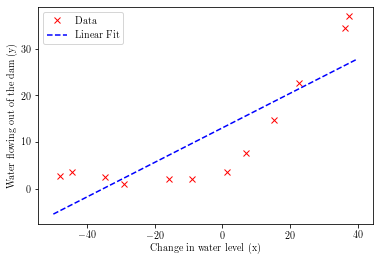

In [3]:
# Train Linear Regression
lam = 0;
theta = func.trainLR(Xb, y, lam)
# plot the result
plt.plot(X, y, 'rx',label='Data')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
xfit = np.linspace(-50,40,100)
yfit = np.concatenate([np.ones([100,1]),xfit.reshape(-1,1)],axis=1)@theta.reshape(-1,1)
plt.plot(xfit, yfit, color='b', ls='--',label='Linear Fit')
plt.legend();

Training Examples	Train Error	Cross Validation Error

1	  0.00	205.12
2	  0.00	110.30
3	  3.29	 45.01
4	  2.84	 48.37
5	 13.15	 35.87
6	 19.44	 33.83
7	 20.10	 31.97
8	 18.17	 30.86
9	 22.61	 31.14
10	 23.26	 28.94
11	 24.32	 29.55
12	 22.37	 29.43


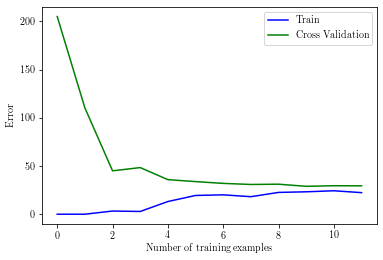

In [4]:
# Learning Curve for Linear Regression
lam = 0
error_train, error_val = func.learningCurve(Xb,y,Xvalb,yval,lam)
plt.plot(error_train, color='b', label='Train')
plt.plot(error_val, color='g', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();
print('Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(len(y)):
    print('{0}\t{1:6.2f}\t{2:6.2f}'.format(i+1,error_train[i],error_val[i]))

In [5]:
# Feature Mapping for Polynomial Regression
p = 8
X_poly = func.polyFeatures(X,p)
mu = np.mean(X_poly,axis=0)
sigma = np.std(X_poly,axis=0)
X_poly = (X_poly-mu)/sigma
Xb_poly = np.concatenate([np.ones([X_poly.shape[0],1]),X_poly],axis=1)
X_poly_val= func.polyFeatures(Xval,p)
X_poly_val = (X_poly_val-mu)/sigma
Xb_poly_val = np.concatenate([np.ones([X_poly_val.shape[0],1]),X_poly_val],axis=1)

Training Examples	Train Error	Cross Validation Error

1	  0.00	161.44
2	  0.00	160.79
3	  0.00	 67.09
4	  0.00	 67.73
5	  0.00	  6.62
6	  0.00	 10.64
7	  0.00	 27.99
8	  0.00	 22.72
9	  0.00	 23.99
10	  0.01	 97.86
11	  0.03	 51.06
12	  0.03	 54.09


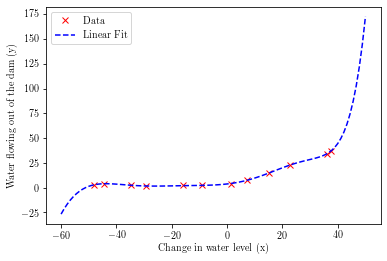

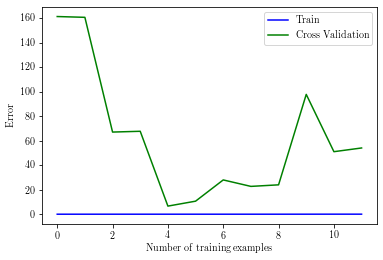

In [6]:
# Learning Curve for Polynomial Regression
lam = 0
theta = func.trainLR(Xb_poly, y, lam)
plt.figure()
plt.plot(X, y, 'rx',label='Data')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
xfit = np.linspace(-60,50,100)
yfit = np.concatenate([np.ones([100,1]),(func.polyFeatures(xfit.reshape(-1,1),p)-mu)/sigma],axis=1)@theta.reshape(-1,1)
plt.plot(xfit, yfit, color='b', ls='--',label='Linear Fit')
plt.legend();
#
plt.figure()
error_train, error_val = func.learningCurve(Xb_poly,y,Xb_poly_val,yval,lam)
plt.plot(error_train, color='b', label='Train')
plt.plot(error_val, color='g', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();
print('Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(len(y)):
    print('{0}\t{1:6.2f}\t{2:6.2f}'.format(i+1,error_train[i],error_val[i]))

Training Examples	Train Error	Cross Validation Error

1	  0.03	 54.09
2	  0.11	  9.36
3	  0.17	 15.92
4	  0.22	 17.15
5	  0.28	 13.22
6	  0.44	  7.93
7	  0.87	  4.76
8	  1.96	  4.26
9	  4.53	  3.83
10	 14.83	  8.89


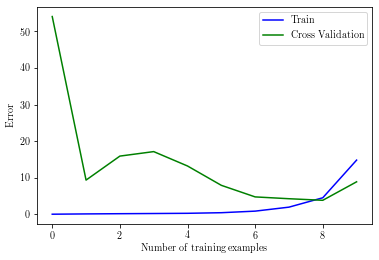

In [7]:
# Validation for Selecting Lambda
lam = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
error_train, error_val = func.learningCurve(Xb_poly,y,Xb_poly_val,yval,lam)
plt.plot(error_train, color='b', label='Train')
plt.plot(error_val, color='g', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();
print('Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(len(lam)):
    print('{0}\t{1:6.2f}\t{2:6.2f}'.format(i+1,error_train[i],error_val[i]))